In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv


In [6]:
df_credits= pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_credits.csv")
df_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [7]:
df_movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [8]:
df_credits.shape

(4803, 4)

So We have 4803 rows and 4 columns in the credits csv.

In [9]:
df_movies.shape

(4803, 20)

And we have 4803 rows and 20 columns in the movies csv.

In [10]:
df_credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [11]:
df_credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

So we don't have any null values in the credits csv.

In [12]:
df_credits.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

Getting the first JSON Data.


In [13]:
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We have null values in 4 columns in movies csv.

Visualizing the missing values in movies csv.

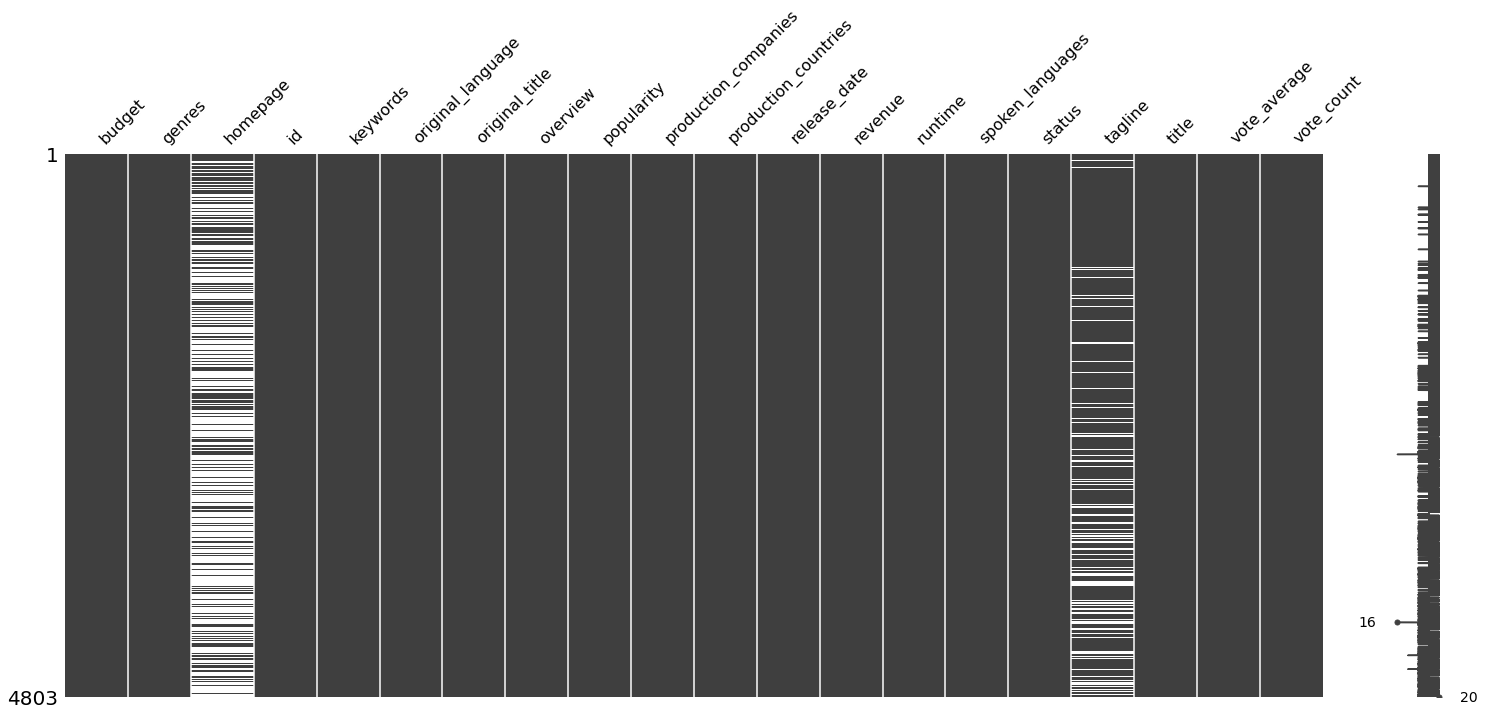

In [14]:
import missingno as msno

msno.matrix(df_movies)

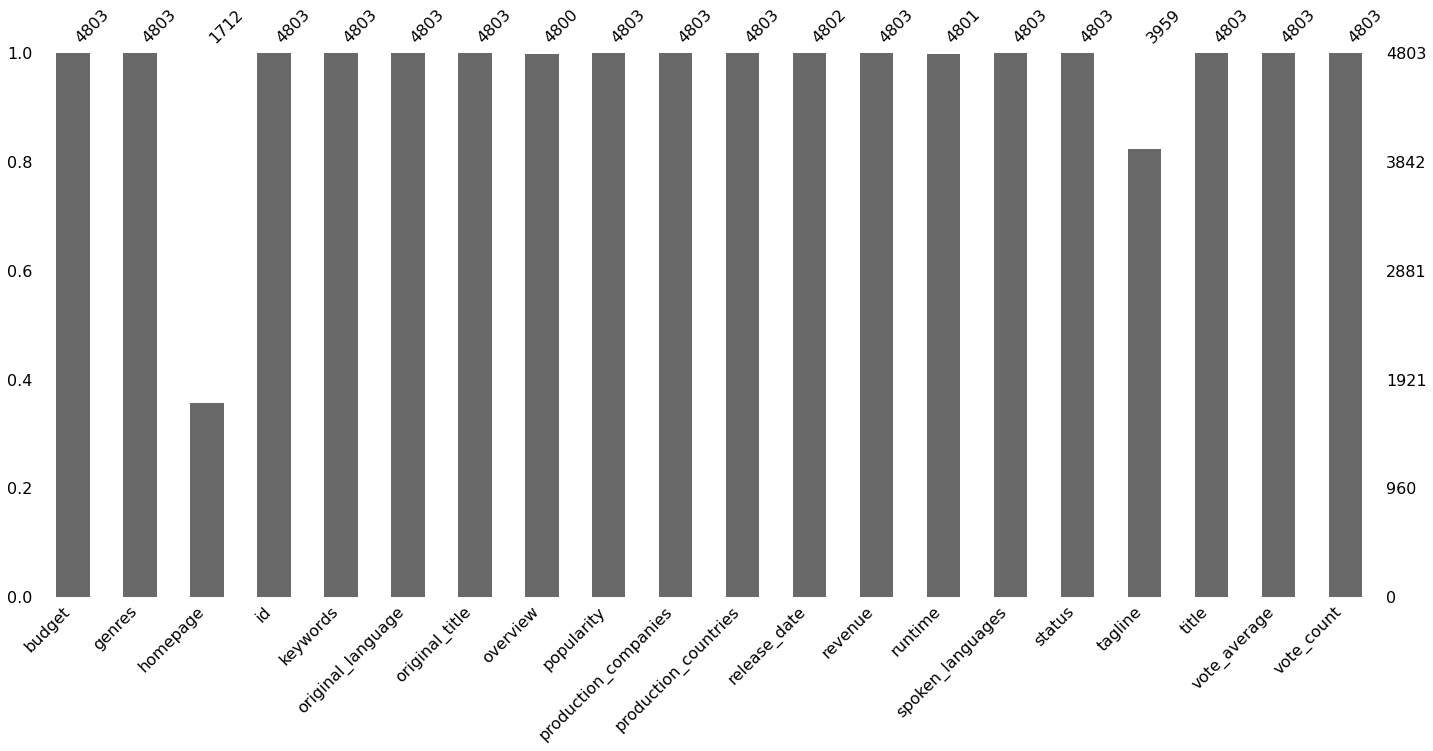

In [15]:
msno.bar(df_movies)

1. So After removing the homepage , we would have a huge loss !


In [16]:
df_movies['tagline']

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800                                                  NaN
4801                             A New Yorker in Shanghai
4802                                                  NaN
Name: tagline, Length: 4803, dtype: object

In [17]:
df_movies['homepage']

0                             http://www.avatarmovie.com/
1            http://disney.go.com/disneypictures/pirates/
2             http://www.sonypictures.com/movies/spectre/
3                      http://www.thedarkknightrises.com/
4                    http://movies.disney.com/john-carter
                              ...                        
4798                                                  NaN
4799                                                  NaN
4800    http://www.hallmarkchannel.com/signedsealeddel...
4801                          http://shanghaicalling.com/
4802                                                  NaN
Name: homepage, Length: 4803, dtype: object

So in case of first task , 'homepage' column would be handy.

**So Replacing all the null values in the movies csv.

In [18]:
df_movies['homepage'] = df_movies['homepage'].fillna(' ')
df_movies['release_date'] = df_movies['release_date'].fillna(' ')
df_movies['runtime'] = df_movies['runtime'].fillna(' ')
df_movies['tagline'] = df_movies['tagline'].fillna(' ')


In [19]:
# Checking null values now

df_movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [20]:
df_movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [21]:
df_movies['overview'] = df_movies['overview'].fillna(' ')

In [22]:
df_movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

So now we have no null values now.

In [23]:
# Checking csv compatibility:

assert df_credits['title'].all() == df_movies['title'].all()
assert df_credits['movie_id'].all() == df_movies['id'].all()


No error in assertion which means the no of rows are same , and there is issue in merging the files.

But to do so we have to rename the credits column  'movie_id' to 'id'

In [24]:
df_credits.columns = ['id','title','cast','crew']
df_merged = df_movies.merge(df_credits,on=['id','title'])
print(df_merged.shape)
print(df_merged.info())
df_merged.head(3)

(4803, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   object 
 14  spoken_languages      4803 non-null   object 
 15  status    

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [25]:
df_merged.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                  object
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

> **Analysis of JSON Data in columns**

In [26]:
df_merged.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
df_merged.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [28]:
df_merged.production_countries[0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [29]:
df_merged.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [30]:
df_merged.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [31]:
assert df_merged['original_title'].all() == df_merged['title'].all()

Since the assertion passed successfully so we can remove of the columns

In [32]:
df_merged.drop(['original_title'],axis=1,inplace=True)

In [33]:
df_merged.shape

(4803, 21)

In [34]:

df_merged['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [36]:
#Convert the JSON data column into JSON type
import json

json_columns = ['genres','cast','crew' ,'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for column in json_columns:
    df_merged[column] = df_merged[column].apply(json.loads)

In [37]:
df_merged.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                  object
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

In [38]:
df_merged.head()

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,961000000,169,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,880674609,148,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,1084939099,165,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,284139100,132,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [47]:
df_merged.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [52]:
# Changing release date type to datetime

df_merged['release_date'] = pd.to_datetime(df_merged['release_date'],errors='coerce').apply(lambda x: x.date())

In [53]:
df_merged['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [54]:
df_merged.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [61]:
print(np.where(df_merged['release_date']==np.datetime64('NaT')))

(array([], dtype=int64),)


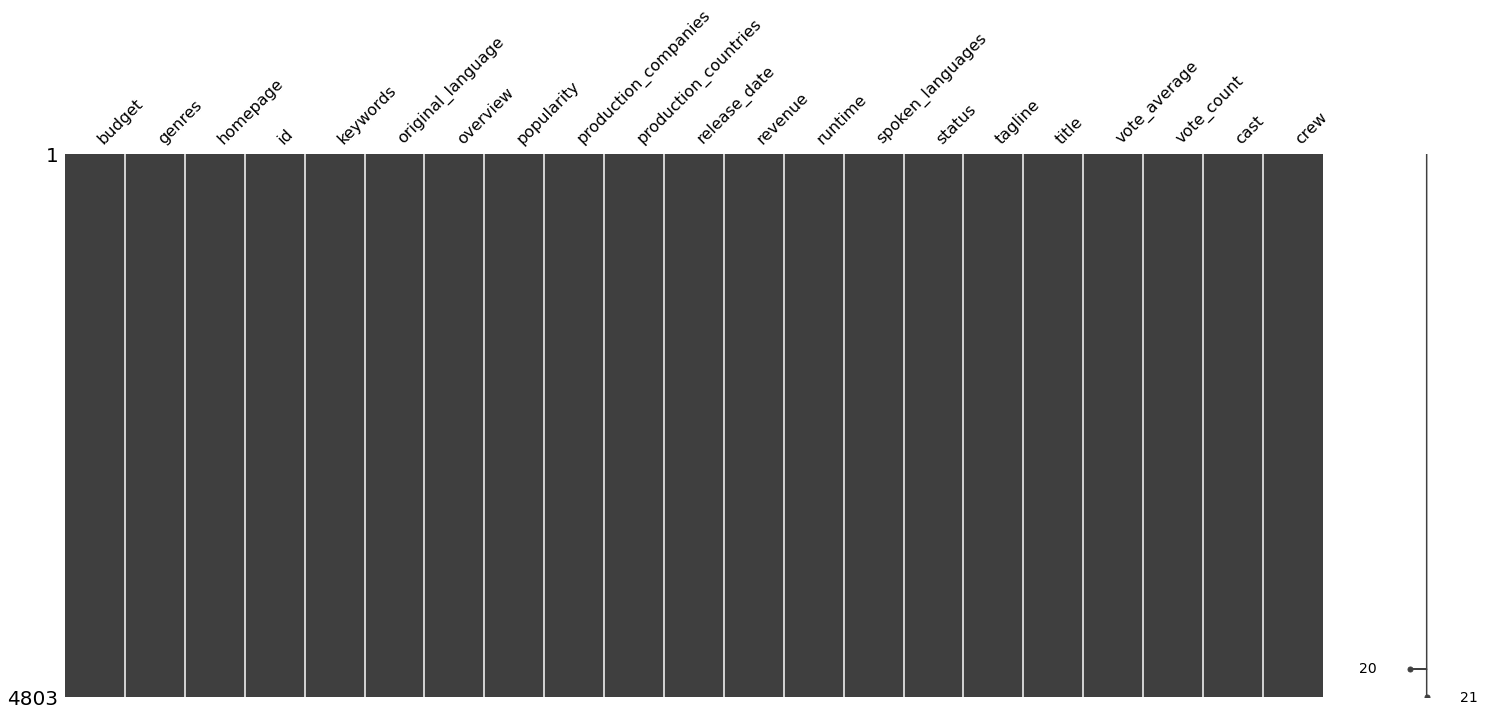

In [58]:
msno.matrix(df_merged)

In [64]:
np.where(df_merged['release_date'].isnull()== True)

(array([4553]),)

In [65]:
df_merged['release_date'][4553]

NaT

In [66]:
df_movies['release_date'][4553]

' '

In [73]:
# So removing 1 row from final merged dataframe

df_merged.drop(index=4553,axis =0,inplace=True)

In [74]:
df_merged.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

Now we don't have any null values in the final merged dataframe.

In [75]:
df_merged.shape

(4802, 21)

Now we have 7 JSONS to work with , so let us look at each.

In [76]:
print(sorted(df_merged.cast.iloc[0][0].keys()))

['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order']


In [77]:

print(sorted(df_merged.crew.iloc[0][0].keys()))

['credit_id', 'department', 'gender', 'id', 'job', 'name']


In [78]:
print(sorted(df_merged.keywords.iloc[0][0].keys()))


['id', 'name']


In [79]:
print(sorted(df_merged.genres.iloc[0][0].keys()))


['id', 'name']


In [80]:
print(sorted(df_merged.production_companies.iloc[0][0].keys()))

['id', 'name']


In [81]:
print(sorted(df_merged.production_countries.iloc[0][0].keys()))

['iso_3166_1', 'name']


In [82]:
print(sorted(df_merged.spoken_languages.iloc[0][0].keys()))

['iso_639_1', 'name']


In [84]:
df_merged.crew[0][1]

{'credit_id': '539c47ecc3a36810e3001f87',
 'department': 'Art',
 'gender': 2,
 'id': 496,
 'job': 'Production Design',
 'name': 'Rick Carter'}

Now we can proceed to feature selection according to task 1. 

In [85]:
df_merged.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [89]:
df_merged.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [93]:
df_merged['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [95]:
np.where(df_merged.title=='Frozen')

(array([124]),)

In [97]:
df_merged.cast[124]

[{'cast_id': 5,
  'character': 'Anna (voice)',
  'credit_id': '52fe4ab7c3a36847f81dddcf',
  'gender': 1,
  'id': 40462,
  'name': 'Kristen Bell',
  'order': 0},
 {'cast_id': 6,
  'character': 'Elsa (voice)',
  'credit_id': '52fe4ab7c3a36847f81dddd3',
  'gender': 1,
  'id': 19394,
  'name': 'Idina Menzel',
  'order': 1},
 {'cast_id': 7,
  'character': 'Kristoff (voice)',
  'credit_id': '52fe4ab7c3a36847f81dddd7',
  'gender': 0,
  'id': 221611,
  'name': 'Jonathan Groff',
  'order': 2},
 {'cast_id': 8,
  'character': 'Olaf (voice)',
  'credit_id': '52fe4ab7c3a36847f81ddddb',
  'gender': 2,
  'id': 54415,
  'name': 'Josh Gad',
  'order': 3},
 {'cast_id': 13,
  'character': 'Hans (voice)',
  'credit_id': '52fe4ab7c3a36847f81dddf1',
  'gender': 2,
  'id': 1188241,
  'name': 'Santino Fontana',
  'order': 4},
 {'cast_id': 10,
  'character': 'Duke (voice)',
  'credit_id': '52fe4ab7c3a36847f81ddde5',
  'gender': 2,
  'id': 21088,
  'name': 'Alan Tudyk',
  'order': 5},
 {'cast_id': 21,
  'charac